In [1]:
import collections
import csv
import pathlib

import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# TODO: Clean up this mess.
import hier
from prepare_hierarchy import util

In [2]:
RESOURCES_DIR = pathlib.Path('resources')

In [3]:
# Load hierarchy.

with open(RESOURCES_DIR / 'hierarchy/tiny_imagenet_fiveai.csv') as f:
    tree, names = hier.make_hierarchy_from_edges(hier.load_edges(f))

In [4]:
g = nx.DiGraph()
g.add_edges_from(tree.edges())

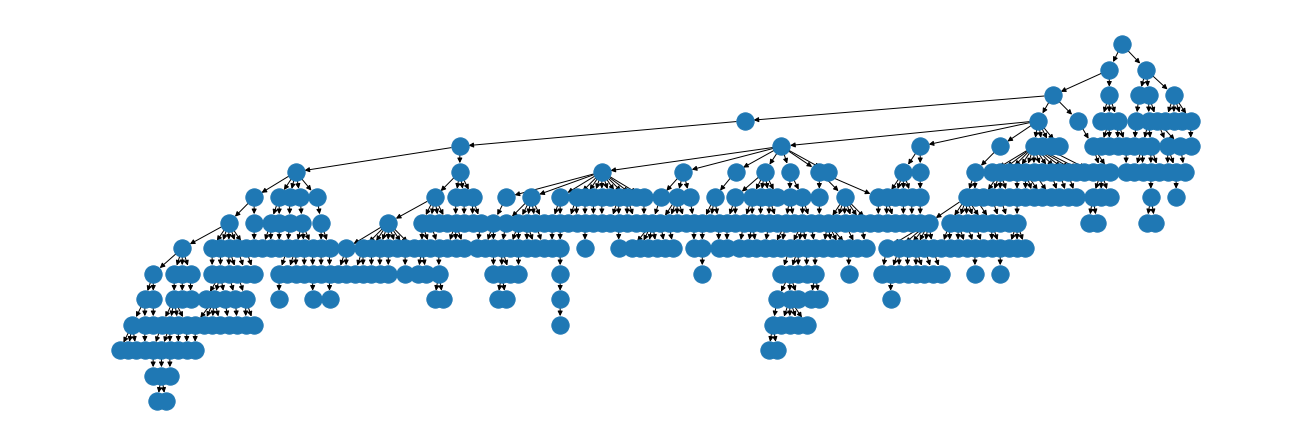

In [5]:
pos = graphviz_layout(g, prog='dot')
plt.figure(figsize=(18, 6))
nx.draw(g, pos)
plt.show()

In [6]:
g_original = g

In [7]:
# g = util.remove_trivial(g_original)

In [8]:
len(g)

413

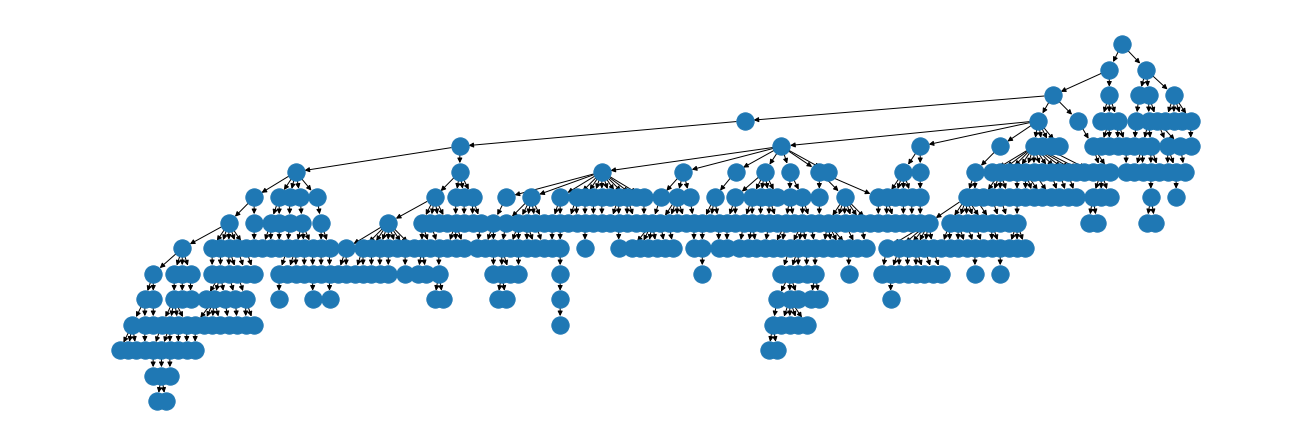

In [9]:
pos = graphviz_layout(g, prog='dot')
plt.figure(figsize=(18, 6))
nx.draw(g, pos)
plt.show()

In [10]:
# How many nodes have n children?
counts = collections.Counter(len(list(g.successors(x))) for x in g)
dict(sorted(counts.items()))

{0: 200, 1: 115, 2: 59, 3: 15, 4: 11, 5: 4, 6: 4, 7: 2, 8: 1, 12: 2}

In [11]:
g_full = g

In [12]:
# Trim hierarchy.

def trim(g, trim_threshold, keep_fraction, root=0):
    h = nx.DiGraph()

    def visit(node):
        children = sorted(g.successors(node))
        if len(children) >= trim_threshold:
            num_keep = int(round(keep_fraction * len(children)))
            print('keep {} of {}'.format(num_keep, len(children)))
            children = children[:num_keep]
        for child in children:
            h.add_edge(node, child)
            visit(child)

    visit(root)
    return h

In [13]:
m = 4
r = 0.25

g = trim(g_full, trim_threshold=m, keep_fraction=1 - r)

keep 4 of 5
keep 4 of 6
keep 3 of 4
keep 3 of 4
keep 3 of 4
keep 3 of 4
keep 4 of 5
keep 6 of 8
keep 5 of 7
keep 5 of 7
keep 9 of 12
keep 4 of 5
keep 3 of 4
keep 3 of 4
keep 4 of 5
keep 3 of 4
keep 3 of 4
keep 4 of 6
keep 4 of 6
keep 9 of 12
keep 3 of 4
keep 3 of 4


In [14]:
len(g), sum(1 for x in g if not g.succ[x])

(340, 155)

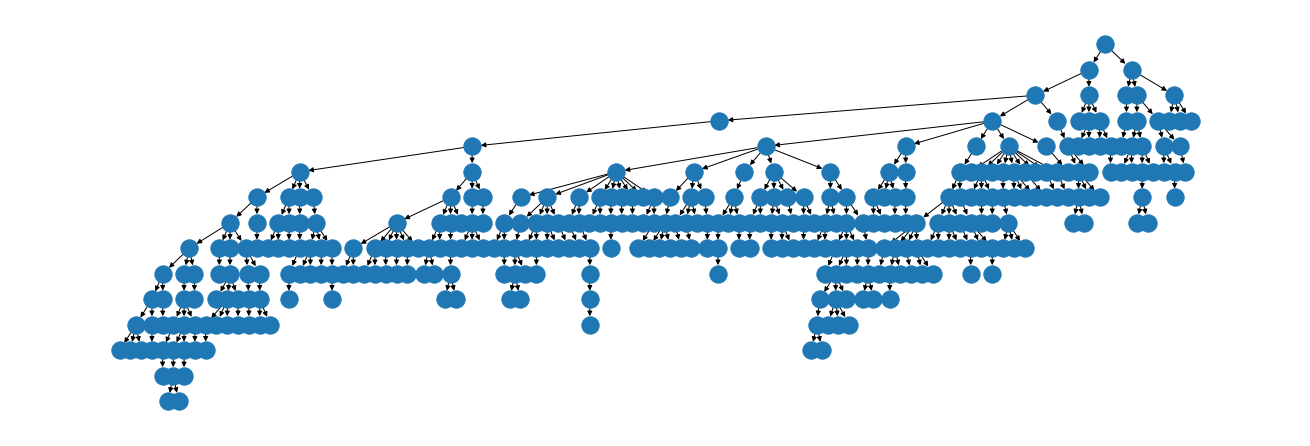

In [15]:
pos = graphviz_layout(g, prog='dot')
plt.figure(figsize=(18, 6))
nx.draw(g, pos)
plt.show()

In [16]:
leaf_order = sorted([x for x in g if not g.succ[x]])

In [17]:
index_edges = util.dfs_edges_with_order(g, leaf_order)
edges = [(names[i], names[j]) for i, j in index_edges]

In [18]:
# # Write hierarchy to file.
# with open(RESOURCES_DIR / 'hierarchy/tiny_imagenet_fiveai_incomplete.csv', 'w') as f:
#     w = csv.writer(f)
#     for edge in edges:
#         w.writerow(edge)

In [19]:
leaf_names = [names[i] for i in leaf_order]

In [20]:
with open(RESOURCES_DIR / f'class_subset/tiny_imagenet_fiveai-{m}-{r}.txt', 'w') as f:
    f.writelines(x + '\n' for x in leaf_names)